## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.25, 0.30, 0.35, 0.4]

In [7]:
results = {}
"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for dropout_ratio in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Dropout Ratio = %.6f" % (dropout_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dropout_ratio)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-dropout-%s" % str(dropout_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Dropout Ratio = 0.250000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None,

50000/50000 [==============================] - 5s 91us/step - loss: 1.5009 - acc: 0.4621 - val_loss: 1.4547 - val_acc: 0.4860
Epoch 50/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.4885 - acc: 0.4632 - val_loss: 1.4566 - val_acc: 0.4742
Experiment with Dropout Ratio = 0.300000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None,

50000/50000 [==============================] - 4s 86us/step - loss: 1.5651 - acc: 0.4370 - val_loss: 1.5237 - val_acc: 0.4628
Epoch 48/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.5719 - acc: 0.4361 - val_loss: 1.5427 - val_acc: 0.4533
Epoch 49/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.5621 - acc: 0.4401 - val_loss: 1.5281 - val_acc: 0.4613
Epoch 50/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.5696 - acc: 0.4366 - val_loss: 1.4969 - val_acc: 0.4746
Experiment with Dropout Ratio = 0.350000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)    

50000/50000 [==============================] - 4s 87us/step - loss: 1.6682 - acc: 0.4028 - val_loss: 1.6211 - val_acc: 0.4317
Epoch 46/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.6685 - acc: 0.4035 - val_loss: 1.6292 - val_acc: 0.4304
Epoch 47/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.6625 - acc: 0.4044 - val_loss: 1.6441 - val_acc: 0.4347
Epoch 48/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.6601 - acc: 0.4025 - val_loss: 1.6156 - val_acc: 0.4461
Epoch 49/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.6658 - acc: 0.4029 - val_loss: 1.5988 - val_acc: 0.4516
Epoch 50/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.6561 - acc: 0.4059 - val_loss: 1.6353 - val_acc: 0.4335
Experiment with Dropout Ratio = 0.400000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (In

Epoch 44/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.7521 - acc: 0.3604 - val_loss: 1.7123 - val_acc: 0.3956
Epoch 45/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.7497 - acc: 0.3627 - val_loss: 1.7399 - val_acc: 0.3903
Epoch 46/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.7419 - acc: 0.3647 - val_loss: 1.7264 - val_acc: 0.3959
Epoch 47/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.7541 - acc: 0.3624 - val_loss: 1.7118 - val_acc: 0.4060
Epoch 48/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.7451 - acc: 0.3637 - val_loss: 1.7259 - val_acc: 0.3879
Epoch 49/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.7448 - acc: 0.3662 - val_loss: 1.7403 - val_acc: 0.3934
Epoch 50/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.7425 - acc: 0.3645 - val_loss: 1.7055 - val_acc: 0.4027


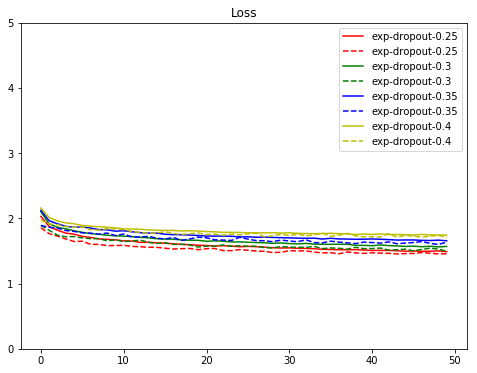

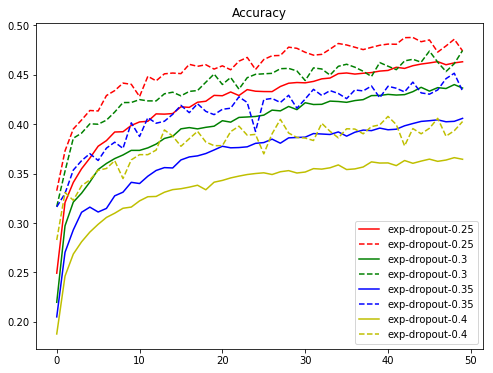

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()